In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for models and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
import pandas as pd

# Replace the URL with your dataset's raw URL from GitHub
#url = "https://raw.githubusercontent.com/sb2043/DM-ML-portfolio/refs/heads/main/data/raw/Nominal%20Dataset/new_model.csv?token=GHSAT0AAAAAACZ2Z562ZDPZBAON56OJOECKZZKH7YQ"
url = "https://raw.githubusercontent.com/sb2043/DM-ML-portfolio/refs/heads/main/data/raw/Nominal%20Dataset/new_model.csv?token=GHSAT0AAAAAACZ2Z563E5KVRFYAFGHQPZ5CZZKKMPA"
kd_data = pd.read_csv(url)

In [3]:
kd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [4]:
kd_data.shape[0],kd_data.shape[1]

(400, 14)

In [5]:
kd_data.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [6]:
# Check for missing values
missing_values = kd_data.isnull().sum()

# Check for duplicates
duplicates = kd_data.duplicated().sum()

print("Missing values per column:\n", missing_values)
print("\nNumber of duplicate rows:", duplicates)


Missing values per column:
 Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

Number of duplicate rows: 0


In [7]:
kd_data.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [8]:
# setting the outliers for column attributes outside the scope of medical possiblity i.e eradicating erreneous value(implausible)

# Reload the original data to reset any prior transformations
kd_data = pd.read_csv(url)

# Handle the 'Bu' column based on the normal ranges provided
# Replace values lower than 7 with NaN as they are biologically implausible
kd_data['Bu'] = kd_data['Bu'].apply(lambda x: pd.NA if x < 7 else x)

# Fill NaN values with the median of the 'Bu' column
kd_data['Bu'].fillna(kd_data['Bu'].median(), inplace=True)


kd_data['Sc'] = kd_data['Sc'].apply(lambda x: pd.NA if x > 15 else x)
kd_data['Sc'].fillna(kd_data['Sc'].median(), inplace=True)
 # Replace NaN with median


# Apply only the lower bound to the 'Sod' column (no upper bound)
kd_data['Sod'] = kd_data['Sod'].apply(lambda x: pd.NA if x < 120 else x)

# Replace NaN with the median of the 'Sod' column
kd_data['Sod'].fillna(kd_data['Sod'].median(), inplace=True)

# Verify the corrected distribution
kd_data['Sod'].describe()


kd_data['Pot'] = kd_data['Pot'].apply(lambda x: pd.NA if x > 10 else x)
kd_data['Pot'].fillna(kd_data['Pot'].median(), inplace=True)
# Replace NaN with median


kd_data['Hemo'] = kd_data['Hemo'].apply(lambda x: pd.NA if x < 6 else x)
kd_data['Hemo'].fillna(kd_data['Hemo'].median(), inplace=True)  # Replace NaN with median



kd_data['Hemo'] = kd_data['Hemo'].apply(lambda x: pd.NA if x < 6 else x)
kd_data['Hemo'].fillna(kd_data['Hemo'].median(), inplace=True)  # Replace NaN with median



kd_data['Rbcc'] = kd_data['Rbcc'].apply(lambda x: pd.NA if x < 3.5 else x)
kd_data['Rbcc'].fillna(kd_data['Rbcc'].median(), inplace=True)  # Replace NaN with median


C:\Users\shoub\AppData\Local\Temp\ipykernel_25708\3781209766.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kd_data['Bu'].fillna(kd_data['Bu'].median(), inplace=True)
C:\Users\shoub\AppData\Local\Temp\ipykernel_25708\3781209766.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kd_data['Bu'].fillna(kd_d

In [9]:
kd_data.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.511750,2.43985,138.308375,4.436000,12.621525,8406.090000,4.863175,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.210901,2.68379,5.302136,0.673435,2.576593,2523.219976,0.633695,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,10.000000,0.40000,120.000000,2.500000,6.000000,2200.000000,3.500000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.750000,0.90000,136.000000,4.000000,10.900000,6975.000000,4.710000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.000000,1.30000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.750000,2.90000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.000000,15.00000,163.000000,7.600000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [10]:
kd_data.nunique()

Bp        11
Sg         5
Al         6
Su         6
Rbc        2
Bu       117
Sc        76
Sod       29
Pot       39
Hemo     111
Wbcc      90
Rbcc      33
Htn        3
Class      2
dtype: int64

In [11]:
coulumns = kd_data.columns

for col in coulumns:
  print(col)
  print(kd_data[col].unique)

Bp
<bound method Series.unique of 0      80.0
1      50.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: Bp, Length: 400, dtype: float64>
Sg
<bound method Series.unique of 0      1.020
1      1.020
2      1.010
3      1.005
4      1.010
       ...  
395    1.020
396    1.025
397    1.020
398    1.025
399    1.025
Name: Sg, Length: 400, dtype: float64>
Al
<bound method Series.unique of 0      1.0
1      4.0
2      2.0
3      4.0
4      2.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: Al, Length: 400, dtype: float64>
Su
<bound method Series.unique of 0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: Su, Length: 400, dtype: float64>
Rbc
<bound method Series.unique of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: Rbc, Length: 400, dtype: floa

In [28]:
# Save the cleaned dataset using the variable 'kd_data'
kd_data.to_csv('cleaned_CKD_dataset.csv', index=False)


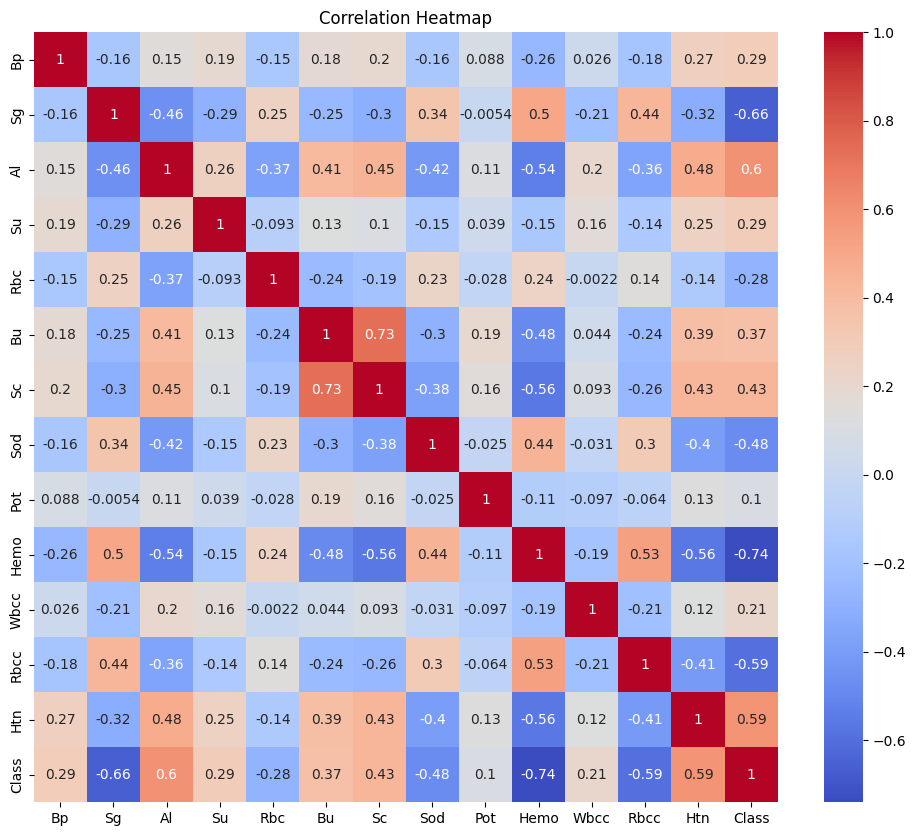

Class    1.000000
Al       0.598389
Htn      0.586340
Sc       0.432755
Bu       0.374224
Su       0.294555
Bp       0.290145
Wbcc     0.205266
Pot      0.101730
Rbc     -0.282642
Sod     -0.480164
Rbcc    -0.593123
Sg      -0.659504
Hemo    -0.740575
Name: Class, dtype: float64
X*X*X*X*X*X*X
Hemo    -0.740575
Sg      -0.659504
Rbcc    -0.593123
Sod     -0.480164
Rbc     -0.282642
Pot      0.101730
Wbcc     0.205266
Bp       0.290145
Su       0.294555
Bu       0.374224
Sc       0.432755
Htn      0.586340
Al       0.598389
Class    1.000000
Name: Class, dtype: float64


In [12]:
correlation_matrix = kd_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',xticklabels=correlation_matrix.columns,yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

# Correlation with the target variable (replace 'readmitted' with the actual target column name)
target_corr = correlation_matrix['Class'].sort_values(ascending=False)
print(target_corr)

print("X*X*X*X*X*X*X")

target_corr = correlation_matrix['Class'].sort_values(ascending=True)
print(target_corr)

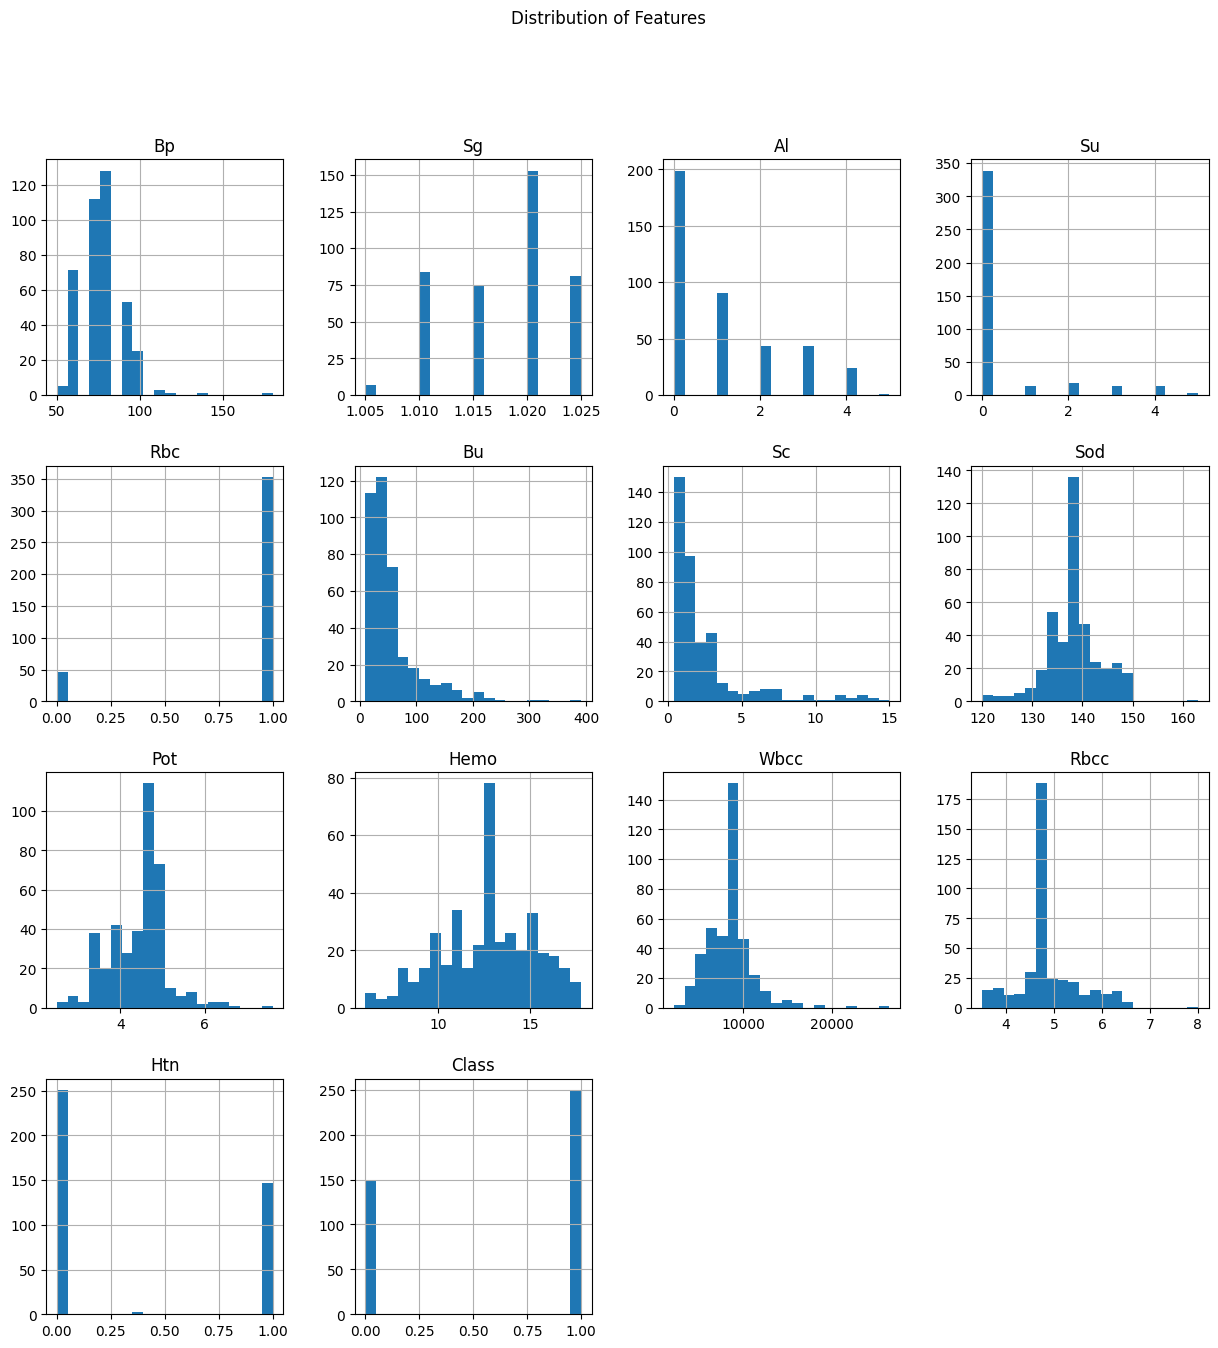

In [13]:
# Plot histograms for all numerical features
kd_data.hist(bins=20, figsize=(15, 15))
plt.suptitle('Distribution of Features')
plt.show()


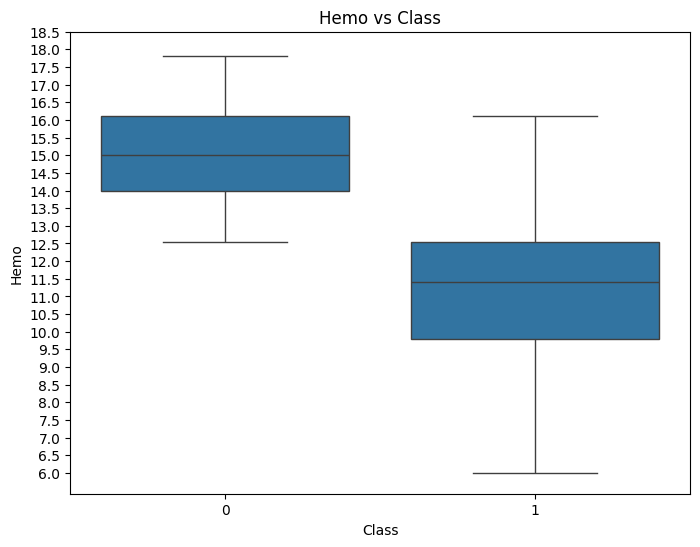

Median Hemoglobin by Class:
 Class
0    15.0
1    11.4
Name: Hemo, dtype: float64


In [14]:
# Adjust the y-axis ticks to be more detailed, showing decimal values for better granularity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting the boxplot with more detailed y-axis labels
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Hemo', data=kd_data)
plt.title('Hemo vs Class')

# Setting detailed y-axis ticks (from 6 to 18 in 0.5 increments)
plt.yticks(np.arange(6, 19, 0.5))

plt.show()

# Calculate and print median values for Hemo grouped by Class
median_hemo = kd_data.groupby('Class')['Hemo'].median()
print("Median Hemoglobin by Class:\n", median_hemo)


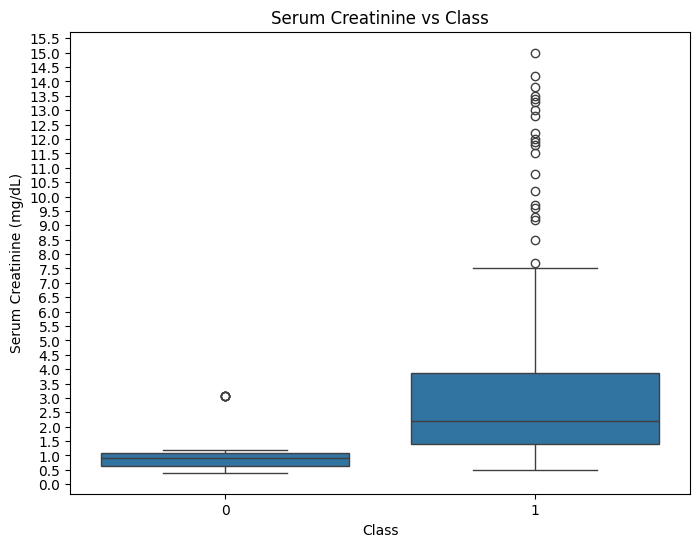

Median Serum Creatinine by Class:
 Class
0    0.9
1    2.2
Name: Sc, dtype: float64


In [15]:
# Boxplot for Serum Creatinine vs Class with detailed y-axis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Sc', data=kd_data)
plt.title('Serum Creatinine vs Class')
plt.xlabel('Class')
plt.ylabel('Serum Creatinine (mg/dL)')
plt.yticks(np.arange(0, kd_data['Sc'].max() + 1, 0.5))  # Setting y-axis ticks with 0.5 increments for detail
plt.show()

median_sc = kd_data.groupby('Class')['Sc'].median()
print("Median Serum Creatinine by Class:\n", median_sc)

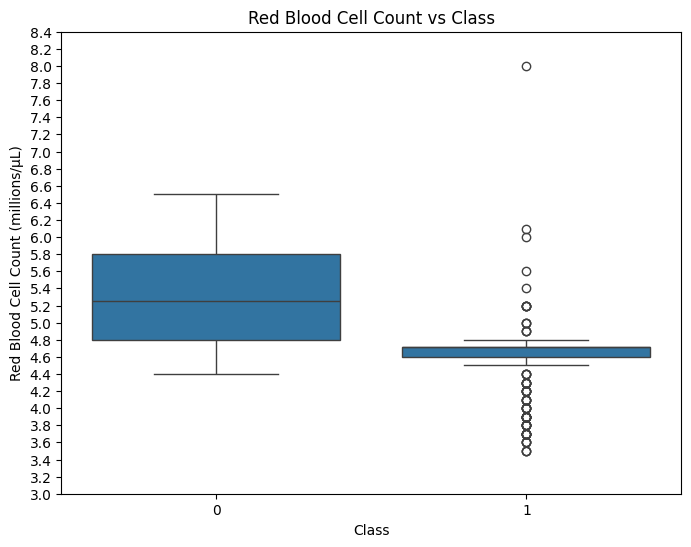

Median Red Blood Cell Count by Class:
 Class
0    5.25
1    4.71
Name: Rbcc, dtype: float64


In [16]:
# Boxplot for Red Blood Cell Count vs Class with detailed y-axis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Rbcc', data=kd_data)
plt.title('Red Blood Cell Count vs Class')
plt.xlabel('Class')
plt.ylabel('Red Blood Cell Count (millions/µL)')
plt.yticks(np.arange(3.0, kd_data['Rbcc'].max() + 0.5, 0.2))  # Setting y-axis ticks with 0.2 increments for detail
plt.show()

# Calculate and print median values for Rbcc grouped by Class
median_rbcc = kd_data.groupby('Class')['Rbcc'].median()
print("Median Red Blood Cell Count by Class:\n", median_rbcc)

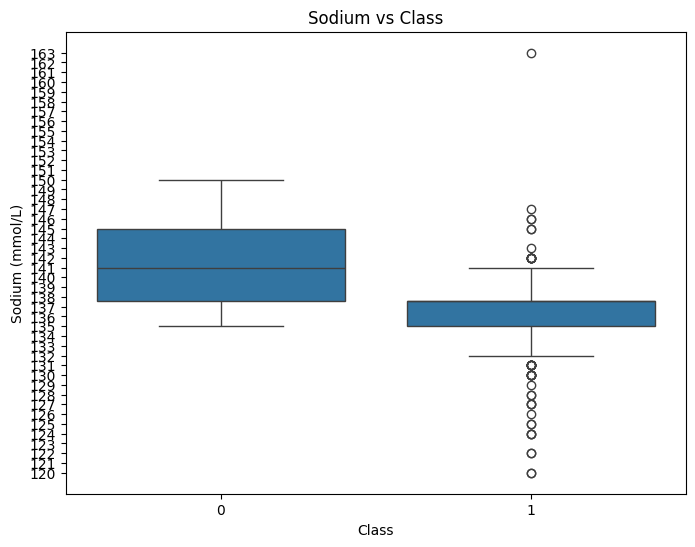

Median Sodium by Class:
 Class
0    141.00
1    137.53
Name: Sod, dtype: float64


In [17]:
# Boxplot for Sodium vs Class with detailed y-axis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Sod', data=kd_data)
plt.title('Sodium vs Class')
plt.xlabel('Class')
plt.ylabel('Sodium (mmol/L)')
plt.yticks(np.arange(120, kd_data['Sod'].max() + 1, 1))  # Setting y-axis ticks with 1 mmol/L increments for detail
plt.show()

# Calculate and print median values for Sod grouped by Class
median_sod = kd_data.groupby('Class')['Sod'].median()
print("Median Sodium by Class:\n", median_sod)

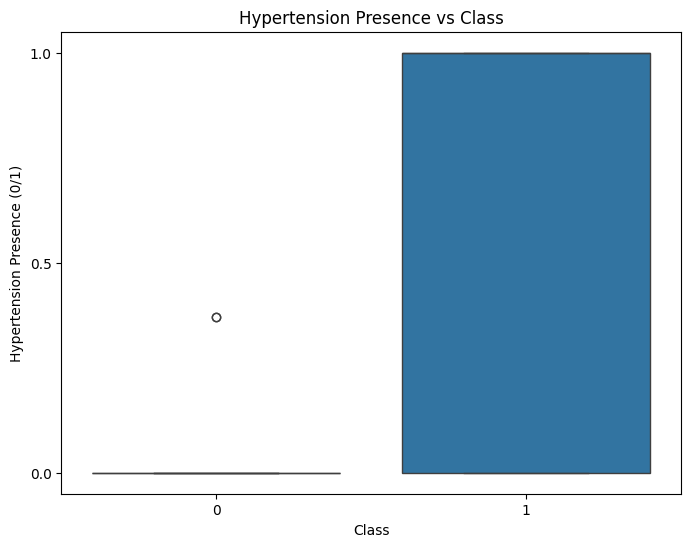

Median Hypertension Presence by Class:
 Class
0    0.0
1    1.0
Name: Htn, dtype: float64


In [18]:
# Boxplot for Hypertension Presence vs Class with detailed y-axis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Htn', data=kd_data)
plt.title('Hypertension Presence vs Class')
plt.xlabel('Class')
plt.ylabel('Hypertension Presence (0/1)')
plt.yticks([0, 0.5, 1])  # Binary outcome, keeping it simple
plt.show()


# Calculate and print median values for Htn grouped by Class
median_htn = kd_data.groupby('Class')['Htn'].median()
print("Median Hypertension Presence by Class:\n", median_htn)

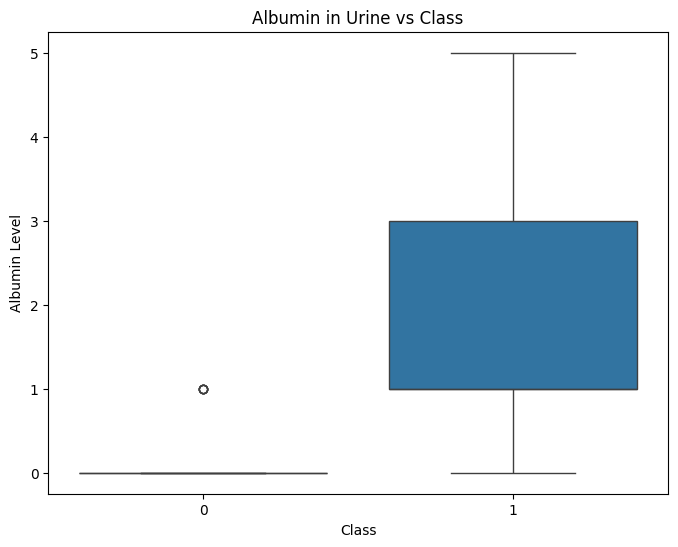

Median Albumin by Class:
 Class
0    0.0
1    1.0
Name: Al, dtype: float64


In [19]:
# Boxplot for Albumin in Urine vs Class with detailed y-axis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Al', data=kd_data)
plt.title('Albumin in Urine vs Class')
plt.xlabel('Class')
plt.ylabel('Albumin Level')
plt.yticks(np.arange(0, kd_data['Al'].max() + 1, 1))  # Setting y-axis ticks with 1-unit increments for detail
plt.show()


# Calculate and print median values for Al grouped by Class
median_al = kd_data.groupby('Class')['Al'].median()
print("Median Albumin by Class:\n", median_al)


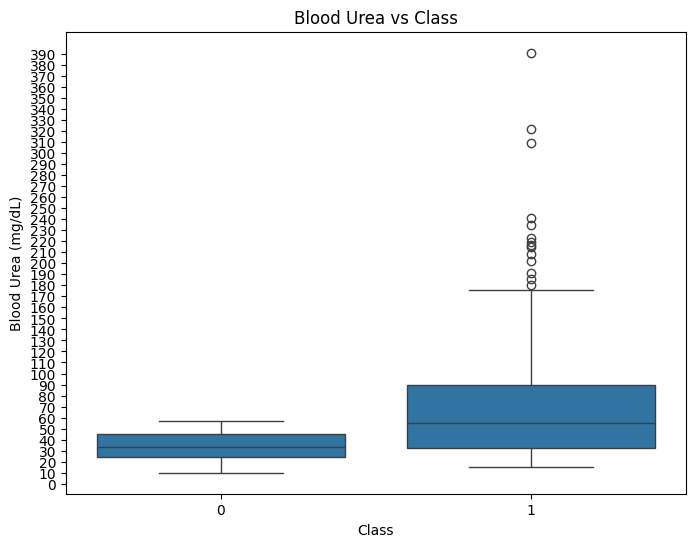

Median Blood Urea by Class:
 Class
0    33.5
1    55.0
Name: Bu, dtype: float64


In [20]:
# Boxplot for Blood Urea vs Class with detailed y-axis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Bu', data=kd_data)
plt.title('Blood Urea vs Class')
plt.xlabel('Class')
plt.ylabel('Blood Urea (mg/dL)')
plt.yticks(np.arange(0, kd_data['Bu'].max() + 5, 10))
plt.show()

# Calculate and print median values for Bu grouped by Class
median_bu = kd_data.groupby('Class')['Bu'].median()
print("Median Blood Urea by Class:\n", median_bu)

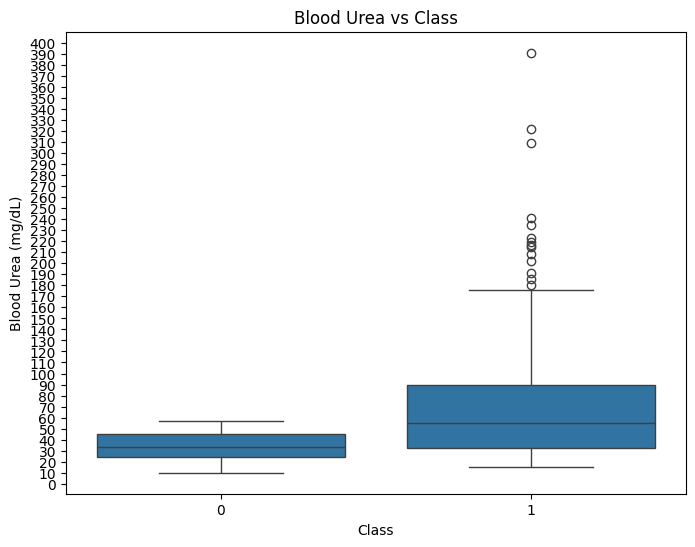

Median Blood Urea by Class:
 Class
0    33.5
1    55.0
Name: Bu, dtype: float64


In [21]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Bu', data=kd_data)  # Using 'data' as the DataFrame
plt.title('Blood Urea vs Class')
plt.xlabel('Class')
plt.ylabel('Blood Urea (mg/dL)')
plt.yticks(np.arange(0, kd_data['Bu'].max() + 10, 10))  # Using 10 mg/dL increments for clearer visualization
plt.show()

# Calculate and print median values for Bu grouped by Class
median_bu = kd_data.groupby('Class')['Bu'].median()
print("Median Blood Urea by Class:\n", median_bu)


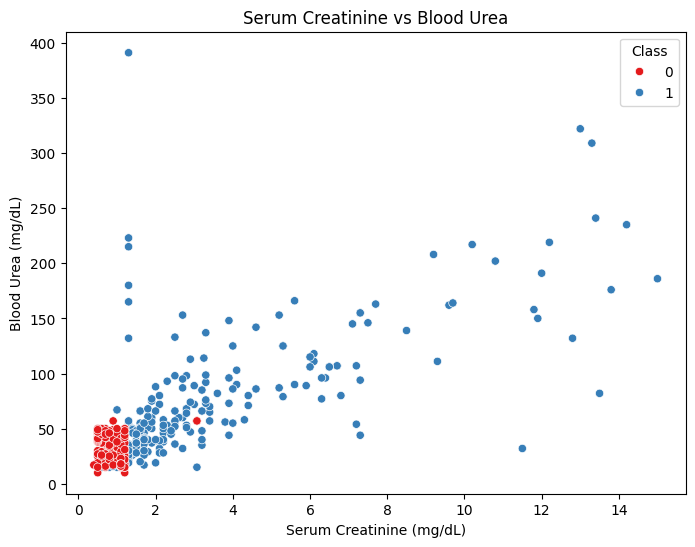

In [22]:
# Scatter plot for Sc vs Bu
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sc', y='Bu', hue='Class', data=kd_data, palette='Set1')
plt.title('Serum Creatinine vs Blood Urea')
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Blood Urea (mg/dL)')
plt.show()


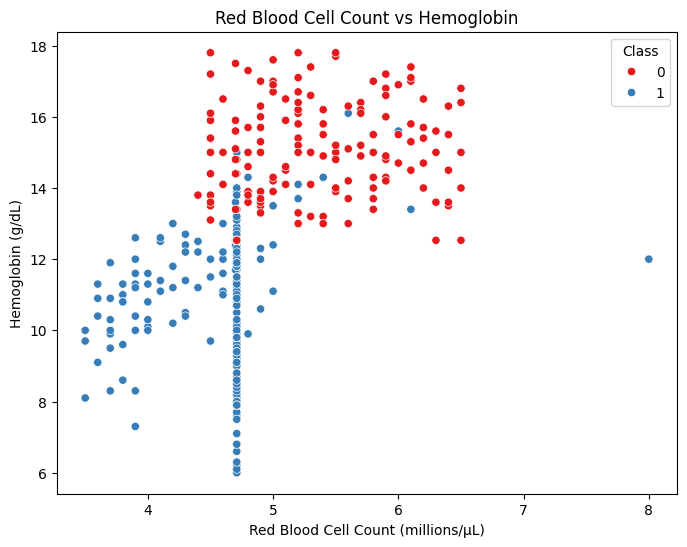

In [23]:
# Scatter plot for Rbcc vs Hemo
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rbcc', y='Hemo', hue='Class', data=kd_data, palette='Set1')
plt.title('Red Blood Cell Count vs Hemoglobin')
plt.xlabel('Red Blood Cell Count (millions/µL)')
plt.ylabel('Hemoglobin (g/dL)')
plt.show()



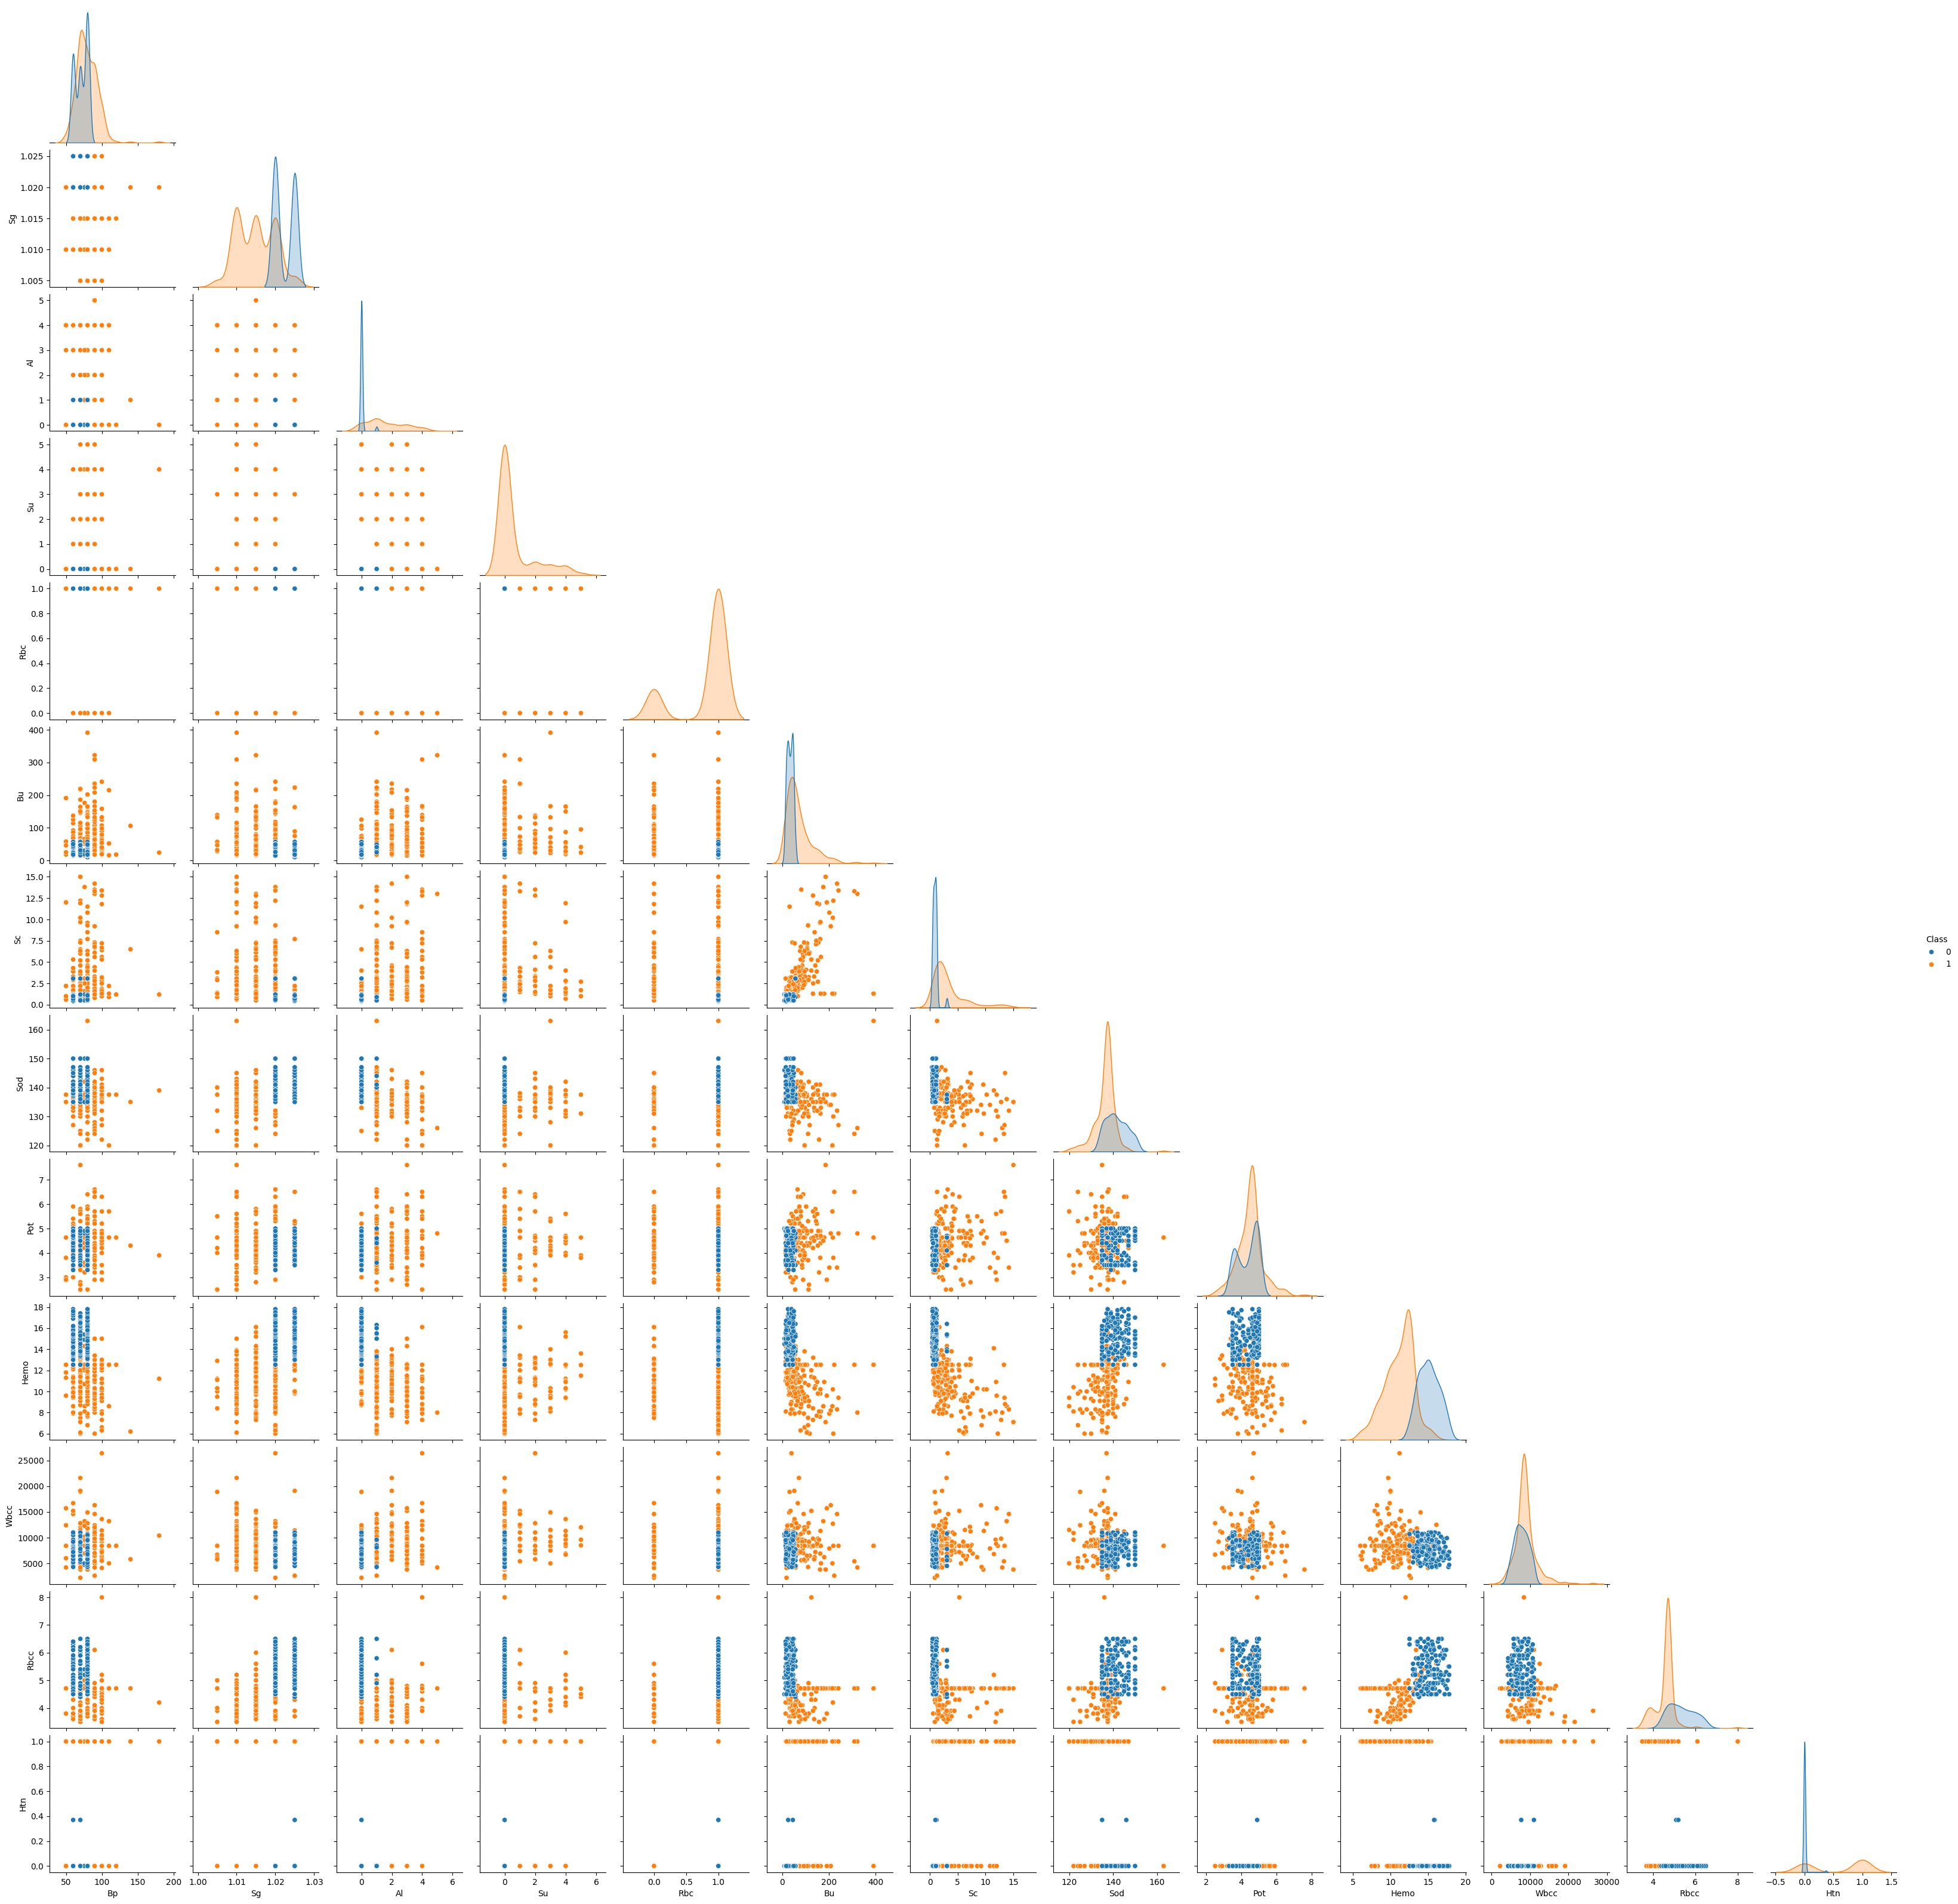

In [24]:
# Pairplot to see interactions between features and target variable
sns.pairplot(kd_data, hue='Class', diag_kind='kde', corner=True)
plt.show()


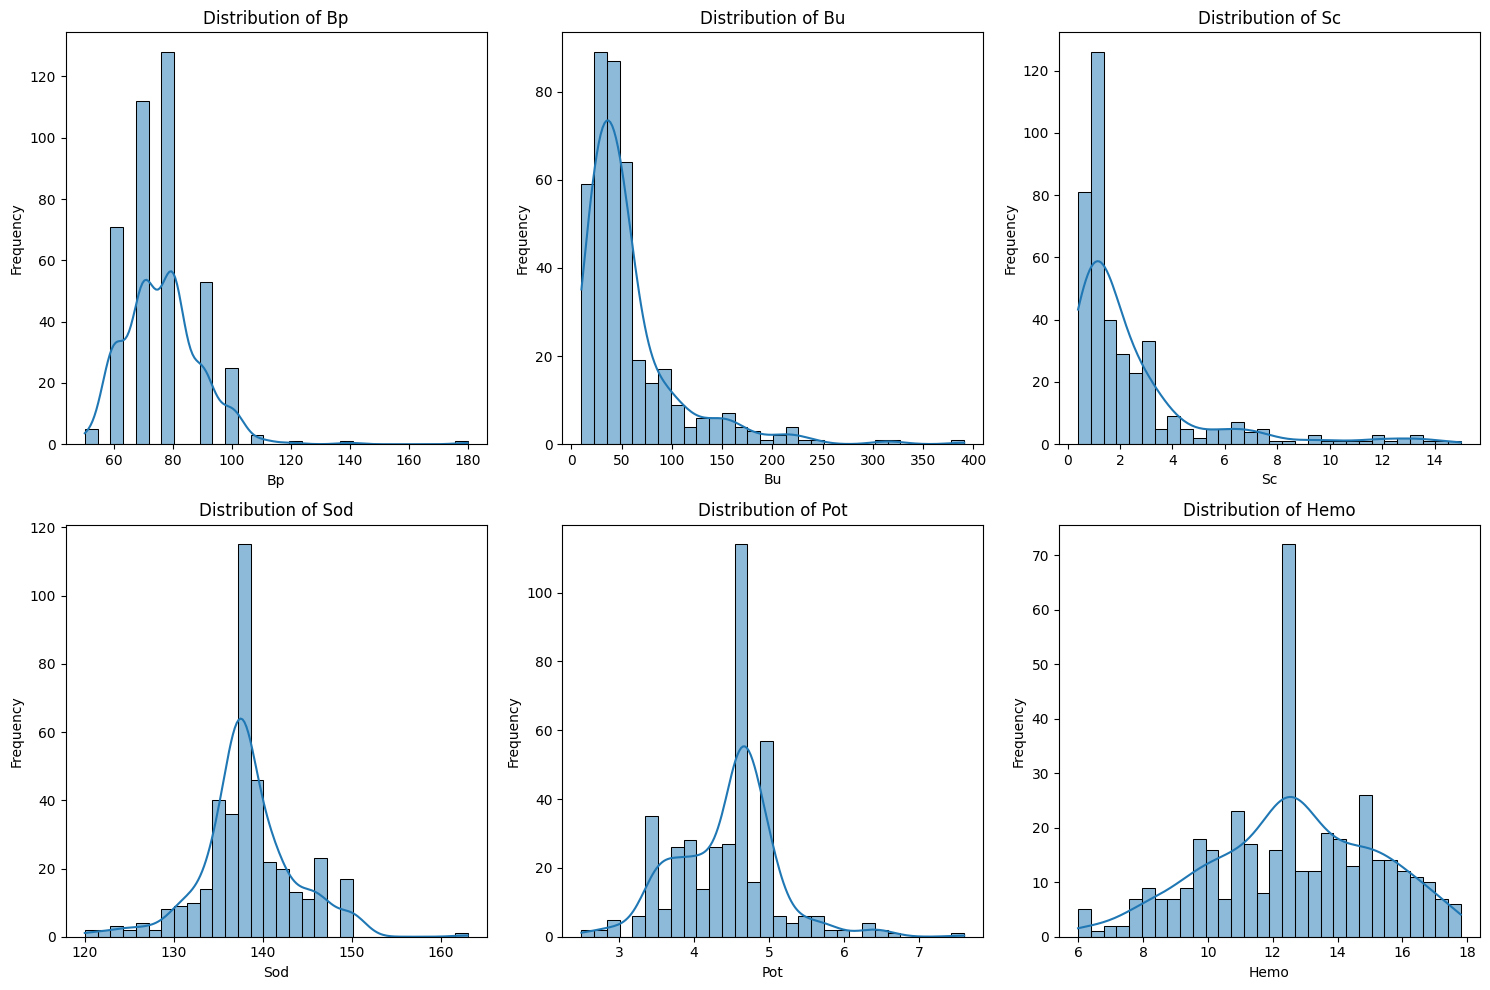

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features_to_plot = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo']

# Generate histograms for the features side by side
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(kd_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\shoub\AppData\Local\Temp\ipykernel_25708\904377253.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


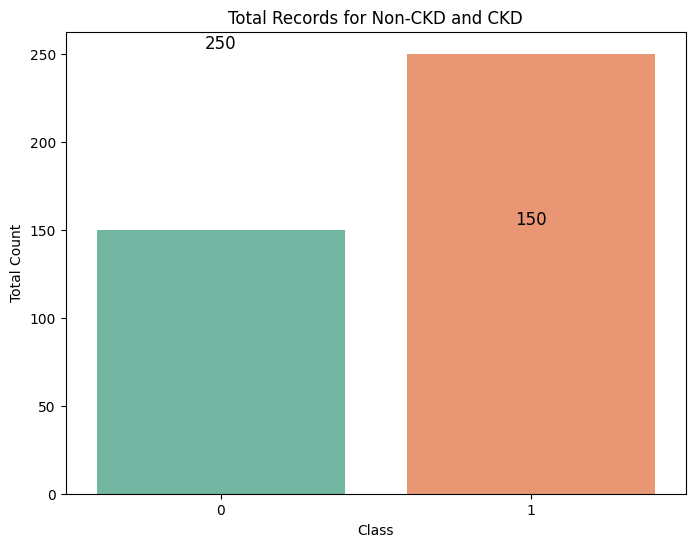

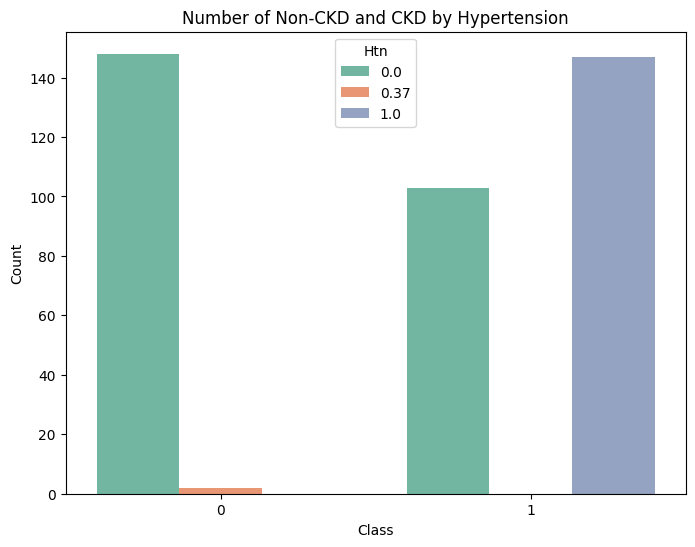

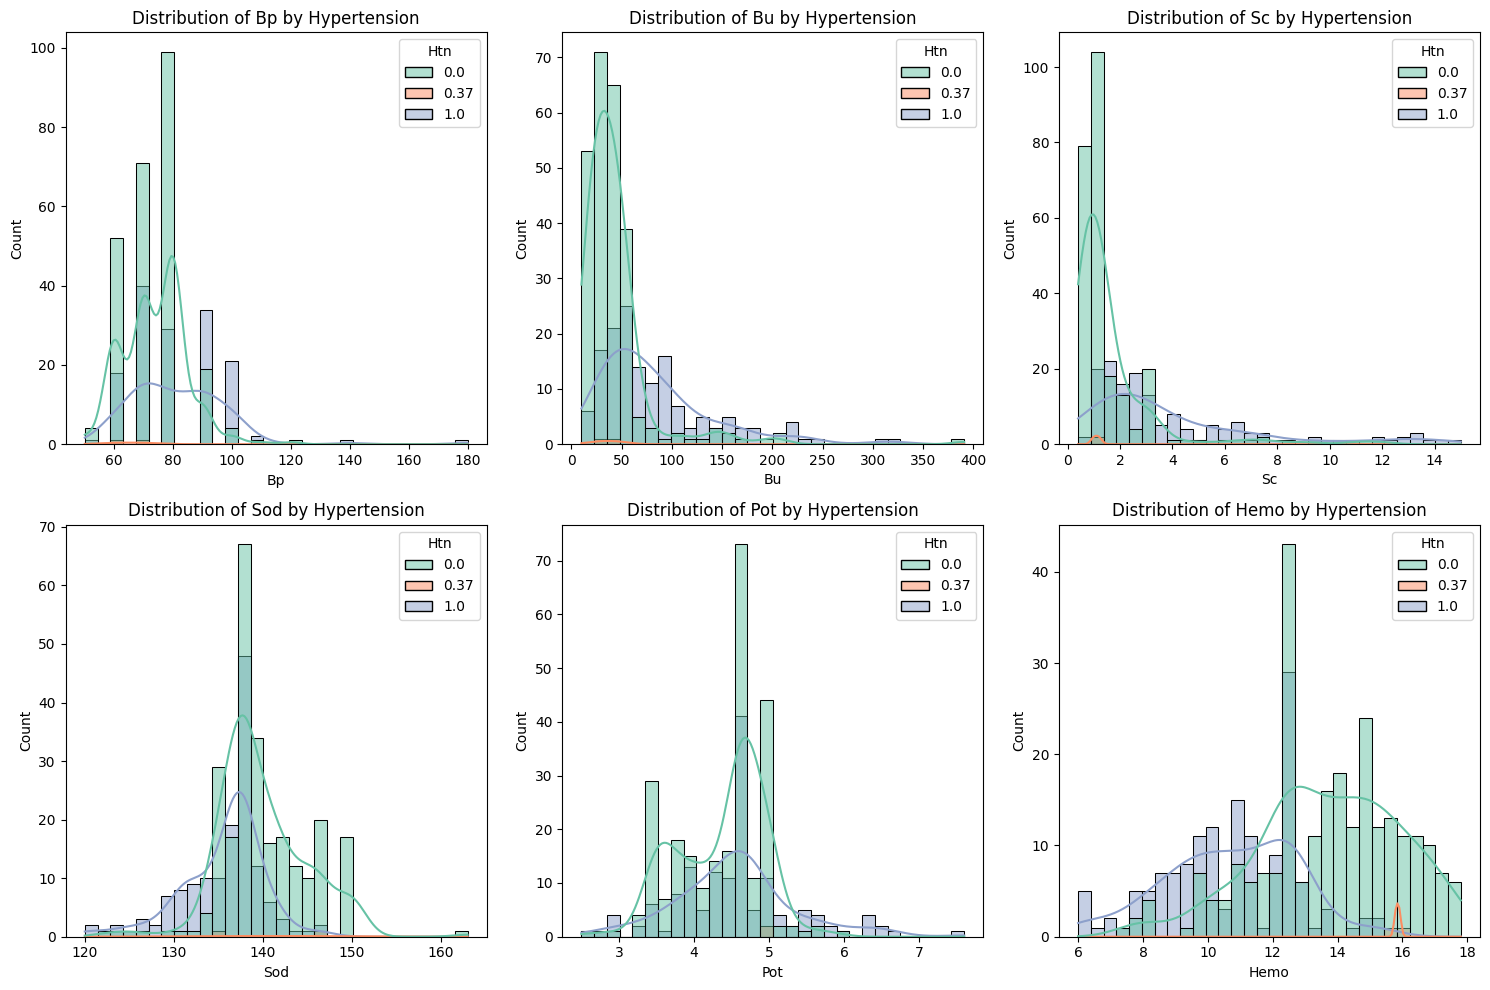

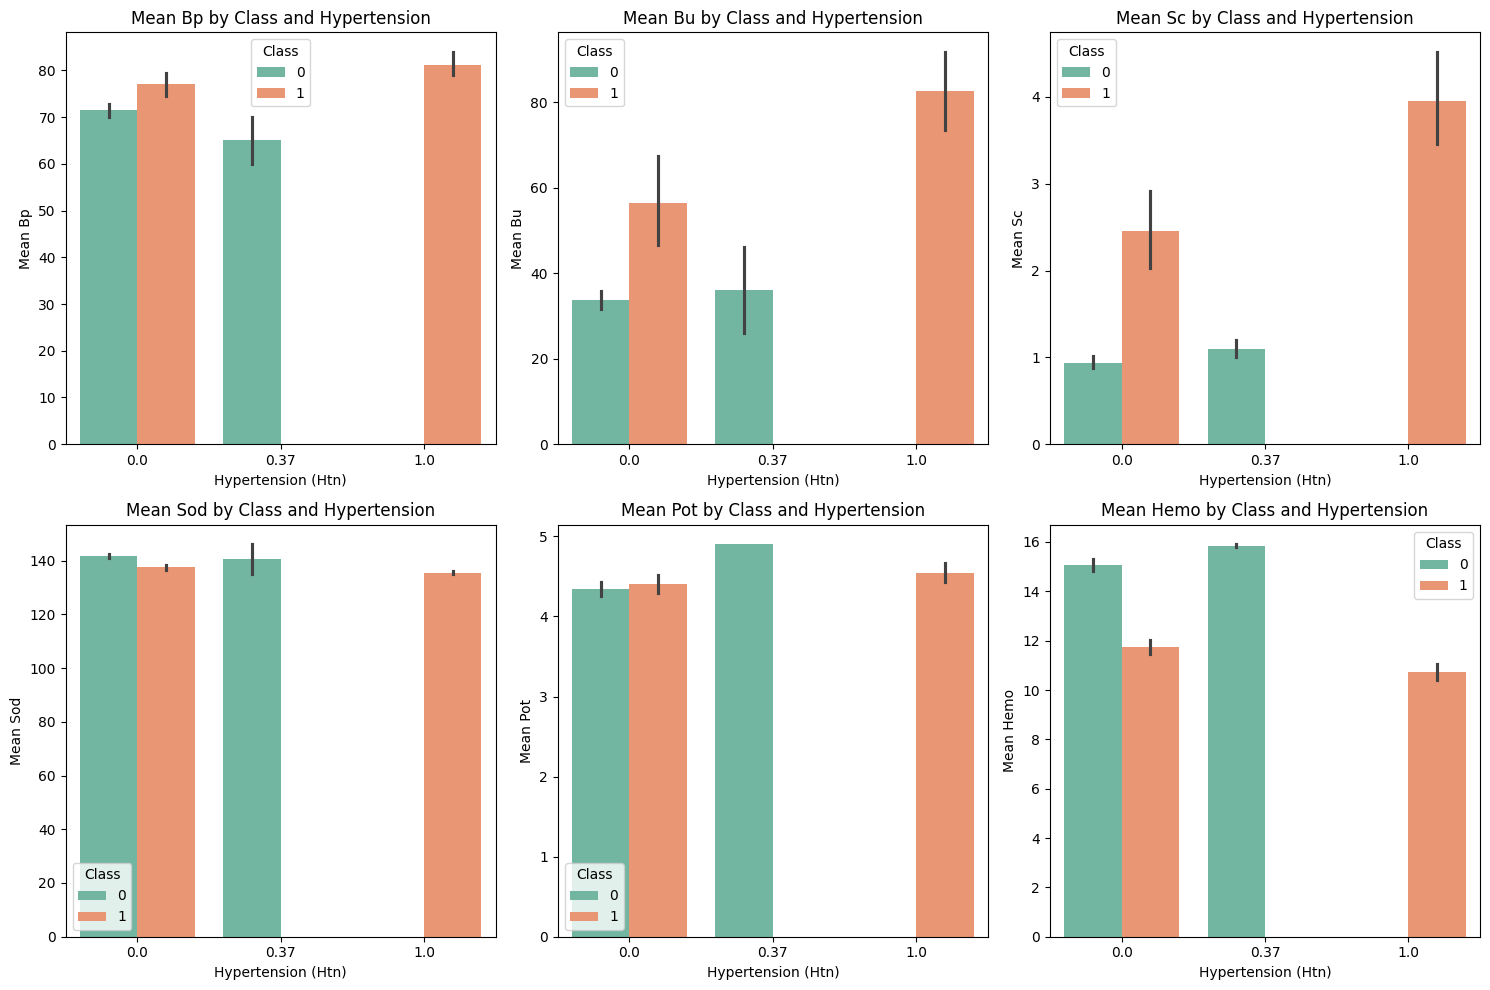

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# 1. Total Records for Non-CKD and CKD
plt.figure(figsize=(8, 6))
class_counts = kd_data['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 3, str(value), ha='center', fontsize=12)
plt.title('Total Records for Non-CKD and CKD')
plt.xlabel('Class')
plt.ylabel('Total Count')
plt.show()

# 2. Number of Non-CKD and CKD by Hypertension
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Htn', data=kd_data, palette="Set2")
plt.title('Number of Non-CKD and CKD by Hypertension')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 3. Histogram distribution of features separated by class (Hypertension as hue)
features_to_plot = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(kd_data, x=feature, hue='Htn', kde=True, bins=30, palette="Set2")
    plt.title(f'Distribution of {feature} by Hypertension')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 4. Barplot showing mean values of features by Class and Hypertension
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='Htn', y=feature, hue='Class', data=kd_data, palette="Set2")
    plt.title(f'Mean {feature} by Class and Hypertension')
    plt.xlabel('Hypertension (Htn)')
    plt.ylabel(f'Mean {feature}')

plt.tight_layout()
plt.show()
